In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn
from tensorflow import keras
from matplotlib import pyplot
import gensim

In [3]:
df_BYDATE = pd.read_csv('/storage/data/ad_matched_queries_20190831__by_date.csv')
df_BYDATE.head(10)

,campaign_label,date,source_medium,campaign,ad_group,ad_matched_query,ad_cost,impressions,clicks,users,new_users,sessions,bounces,created_accounts,transactions,transaction_revenue
0,brand,2017-03-07,google / cpc,Brand Terms,Paperspace For Teams,paper space,0.31,4,1,1,1,1,0,0,0,0.0
1,brand,2017-03-07,google / cpc,Brand Terms,Paperspace For Teams,paperspace,1.06,28,5,4,3,4,2,0,0,0.0
2,brand,2017-03-08,google / cpc,Brand Terms,Paperspace For Teams,paperspace,0.94,24,3,1,0,1,0,0,0,0.0
3,brand,2017-03-09,google / cpc,Brand Terms,Paperspace For Teams,paperspace,1.70,50,4,2,2,2,1,0,0,0.0
4,brand,2017-03-10,google / cpc,Brand Terms,Paperspace For Teams,paperspace,4.57,49,7,5,4,9,0,1,1,6.0
5,brand,2017-03-11,google / cpc,Brand Terms,Paperspace For Teams,paperspace,1.22,14,2,3,2,7,0,0,0,0.0
6,brand,2017-03-12,google / cpc,Brand Terms,Paperspace For Teams,paperspace,1.62,28,2,4,1,7,4,0,0,0.0
7,brand,2017-03-13,google / cpc,Brand Terms,Paperspace For Teams,paperspace,6.81,24,9,6,2,9,0,0,0,0.0
8,brand,2017-03-14,google / cpc,Brand Terms,Paperspace For Teams,paperspace,5.56,37,8,7,3,7,4,0,0,0.0
9,brand,2017-03-15,google / cpc,Brand Terms,Paperspace For Teams,paperspace,2.51,48,3,5,4,7,1,1,1,15.0


In [ ]:
## keywords dataset
#df_keywords = pd.read_csv('Search keyword report 20190916.csv')
#df_keywords

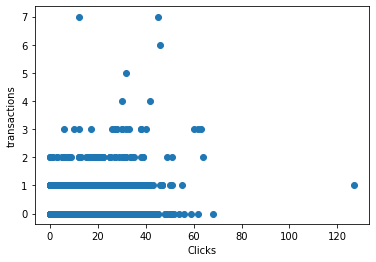

In [191]:
pyplot.scatter(df_BYDATE['clicks'], df_BYDATE['transactions'])
pyplot.xlabel('Clicks')
pyplot.ylabel('transactions')
pyplot.show()

In [192]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df_BYDATE['clicks'], df_BYDATE['created_accounts'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.609


In [5]:
#import seaborn as sns

#df1 = df_BYDATE.iloc[:,7:15]

#corr = df1.corr()
#ax = sns.heatmap(
#    corr, 
#    vmin=-1, vmax=1, center=0,
#    cmap=sns.diverging_palette(20, 220, n=200),
#    square=True
#)
#ax.set_xticklabels(
#    ax.get_xticklabels(),
#    rotation=45,
#    horizontalalignment='right'
#);

In [ ]:
#df_BYDATE['transaction/clicks'] = df_BYDATE['transactions'] / df_BYDATE['clicks']

In [6]:
counts = df_BYDATE['clicks'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(counts)

0      85259
1      82366
2      10838
3       3688
4       1970
5       1107
6        772
7        542
8        390
9        286
10       222
11       188
12       146
13       103
14        93
16        77
15        65
17        63
22        60
19        56
21        53
20        51
18        48
27        45
25        41
26        37
24        36
31        36
29        31
28        31
30        29
23        29
34        21
32        20
37        19
35        18
33        16
38        13
36        10
39         9
40         6
41         6
42         6
43         5
44         5
51         4
47         3
50         3
45         3
46         2
48         2
49         2
62         2
68         1
60         1
64         1
63         1
54         1
59         1
56         1
55         1
52         1
127        1
Name: clicks, dtype: int64


In [ ]:
#condense bins for classes with only one instance: 68-127

from sklearn.model_selection import StratifiedKFold
#import xgboost as xgbdata = pd.read_csv('filepath')X = data.drop(['target'], axis = 1)

X = df_BYDATE['']
y = df_BYDATE['clicks']

bins = np.linspace(0, 1, 100) 
y_binned = np.digitize(y, bins)
skf = StratifiedKFold(n_splits = 5, shuffle = True)

for train_index, test_index in skf.split(X, y_binned):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

# random parameters
xgb_params = {'objective' : 'reg:linear', 
                'eval_metric' : 'mae', 
                'seed' : 5, 
                'silent' : True}
d_train = xgb.DMatrix(X_train, y_train)
d_valid = xgb.DMatrix(X_valid, y_valid)
    
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
model = xgb.train(
    xgb_params, 
    d_train, 
    1000, 
    watchlist, 
    maximize = False, 
    verbose_eval = 50, 
    early_stopping_rounds = 100)

In [194]:
# The maximum number of words to be used.
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 29
# This is fixed.
EMBEDDING_DIM = 100

In [195]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer(num_words=MAX_NB_WORDS)
t.fit_on_texts(df_BYDATE['ad_matched_query'])

#print(t.word_counts)
#print(t.document_count)
#print(t.word_index)
#print(t.word_docs)

In [196]:
word_index = t.word_index
print('Found %s unique tokens.' % len(word_index))

Found 8704 unique tokens.


In [197]:
sequenced_queries = t.texts_to_sequences(df_BYDATE['ad_matched_query'])
#sequenced_queries

In [198]:
from keras_preprocessing import sequence

max_length = len(max(sequenced_queries, key=len))

padded_sequences = sequence.pad_sequences(sequenced_queries, maxlen=max_length)

padded_sequences.shape
#t.word_index

(188943, 29)

In [410]:
Y = pd.get_dummies(df_BYDATE['clicks']).values
Y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [200]:
embeddings_index = {}
f = open('/storage/data/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [201]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [202]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
# Turn into binary variable
#df_BYDATE['create_account1'] = np.where(df_BYDATE["created_accounts"] > 0, 1, 0)
#df_BYDATE['create_account1'].value_counts()

In [ ]:
#query_train, query_val, created_train, created_val = train_test_split(query_train, created_train, test_size=0.2, random_state=1)

# when do to tokenization? for bag of words, create matrix ASAP--preprocess everything before traintestsplit
# merge transaction and created account
# impressions, clicks

In [415]:
#created dateset that can be stratified
stratify = df_BYDATE['clicks']*2
stratify = pd.get_dummies(stratify).values
stratify

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [416]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(padded_sequences, Y,test_size=0.5, stratify=stratify, random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
#padded_sequences

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [204]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

model = Sequential()
model.add(embedding_layer)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
#model.add(Dense(32, activation='relu', activity_regularizer=l1(0.001)))
model.add(Dense(63, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 29, 100)           870500    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 29, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 63)                6363      
Total params: 957,263
Trainable params: 86,763
Non-trainable params: 870,500
_________________________________________________________________
None


In [205]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 5
batch_size = 64

#class_weight = {0: 1.,}

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 136038 samples, validate on 15116 samples
Epoch 1/5
136038/136038 [==============================] - 250s 2ms/sample - loss: 1.1546 - acc: 0.4894 - val_loss: 1.1083 - val_acc: 0.4820
Epoch 2/5
136038/136038 [==============================] - 243s 2ms/sample - loss: 1.0946 - acc: 0.5161 - val_loss: 1.0810 - val_acc: 0.5224
Epoch 3/5
136038/136038 [==============================] - 243s 2ms/sample - loss: 1.0817 - acc: 0.5249 - val_loss: 1.0667 - val_acc: 0.5453
Epoch 4/5
136038/136038 [==============================] - 243s 2ms/sample - loss: 1.0745 - acc: 0.5288 - val_loss: 1.0631 - val_acc: 0.5527
Epoch 5/5
136038/136038 [==============================] - 243s 2ms/sample - loss: 1.0698 - acc: 0.5328 - val_loss: 1.0639 - val_acc: 0.5482


In [206]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

37789/37789 [==============================] - 36s 959us/sample - loss: 1.0685 - acc: 0.5372
Test set
  Loss: 1.069
  Accuracy: 0.537


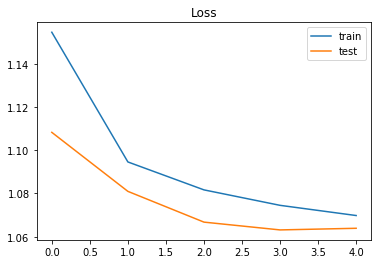

In [207]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


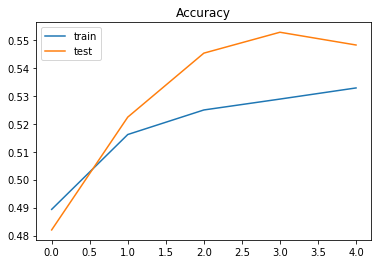

In [208]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [209]:
new_query = ['GPU computing Paperspace parsec']
seq = t.texts_to_sequences(new_query)
padded = sequence.pad_sequences(seq, maxlen=29)
pred = model.predict(padded)
labels = df_BYDATE['clicks']
print(pred, "Predicted Clicks:" ,labels[np.argmax(pred)])

[[2.47152433e-01 7.38675475e-01 1.31162619e-02 8.42319161e-04
  1.42954988e-04 4.36911287e-05 1.04697529e-05 4.68903045e-06
  3.74710157e-06 2.09930909e-06 7.22731329e-07 8.53300890e-07
  7.03213345e-07 1.44780515e-07 1.75753215e-07 1.62891979e-07
  1.56716993e-07 1.73882484e-07 9.78388428e-08 5.74920271e-08
  6.84833239e-08 5.01738782e-07 6.12143367e-07 1.18075391e-07
  1.12299517e-07 1.76664869e-07 1.14940697e-07 8.18452364e-08
  1.72698208e-07 3.97091107e-08 5.68210332e-08 4.39840875e-08
  2.45854608e-08 2.62647983e-08 4.06452791e-08 2.40846543e-08
  1.72241190e-08 2.10964799e-07 1.84809949e-07 6.63098465e-09
  3.97881088e-08 3.08681436e-08 1.91106899e-08 1.36192941e-08
  6.89333532e-08 1.52699720e-08 6.78880330e-09 6.32815045e-09
  1.83625932e-08 9.87468302e-11 8.55142712e-09 2.55141935e-10
  1.80486376e-10 7.10423143e-09 1.91590646e-10 4.22903490e-09
  1.04088675e-08 8.51599236e-09 6.08872996e-09 6.60788924e-10
  1.72400108e-10 4.11958689e-10 4.16694146e-09]] Predicted Clicks: 5


In [210]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y_bin = label_binarize(Y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62])
Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62])
Y_train_bin = label_binarize(Y_train, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62])

n_classes = Y.shape[1]

y_score = model.predict(X_test, verbose=0)

In [211]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_bin[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test_bin[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test_bin.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test_bin, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

/opt/conda/envs/insightfall2019_sklearn/lib/python3.7/site-packages/sklearn/metrics/ranking.py:528: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score, micro-averaged over all classes: 0.57


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.57')

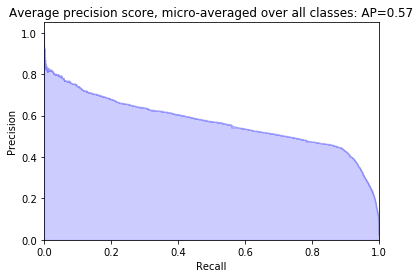

In [212]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

In [213]:
y_pred = model.predict(X_test)

In [308]:
y_pred.shape

(37789, 63)

In [314]:
#def softmax(x):
#    """Compute softmax values for each sets of scores in x."""
#    e_x = np.exp(x - np.max(x))
#    return e_x / e_x.sum()

In [399]:
num_classes = 63

y_pred1 = np.argmax(y_pred, axis=1)
#y_categorical = tf.keras.utils.to_categorical(y_pred, num_classes)

originalShape = y_pred1.shape
totalFeatures = y_pred1.max() + 1

categorical = y_pred1.reshape((-1,))
categorical = tf.keras.utils.to_categorical(categorical, num_classes)

print(Y_test.shape)
print(categorical.shape)
categorical

(37789, 63)
(37789, 63)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [394]:
Y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [402]:
from sklearn.metrics import classification_report

targetnames = df_BYDATE['clicks'].unique()
print(classification_report(Y_test, categorical))
print(targetnames)

              precision    recall  f1-score   support

           0       0.50      0.83      0.62     16852
           1       0.66      0.38      0.48     16658
           2       0.00      0.00      0.00      2188
           3       0.00      0.00      0.00       724
           4       0.00      0.00      0.00       388
           5       0.00      0.00      0.00       227
           6       0.00      0.00      0.00       157
           7       0.00      0.00      0.00       113
           8       0.00      0.00      0.00        72
           9       0.00      0.00      0.00        45
          10       0.00      0.00      0.00        37
          11       0.00      0.00      0.00        46
          12       0.00      0.00      0.00        29
          13       0.00      0.00      0.00        22
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        14
          17       0.00    